
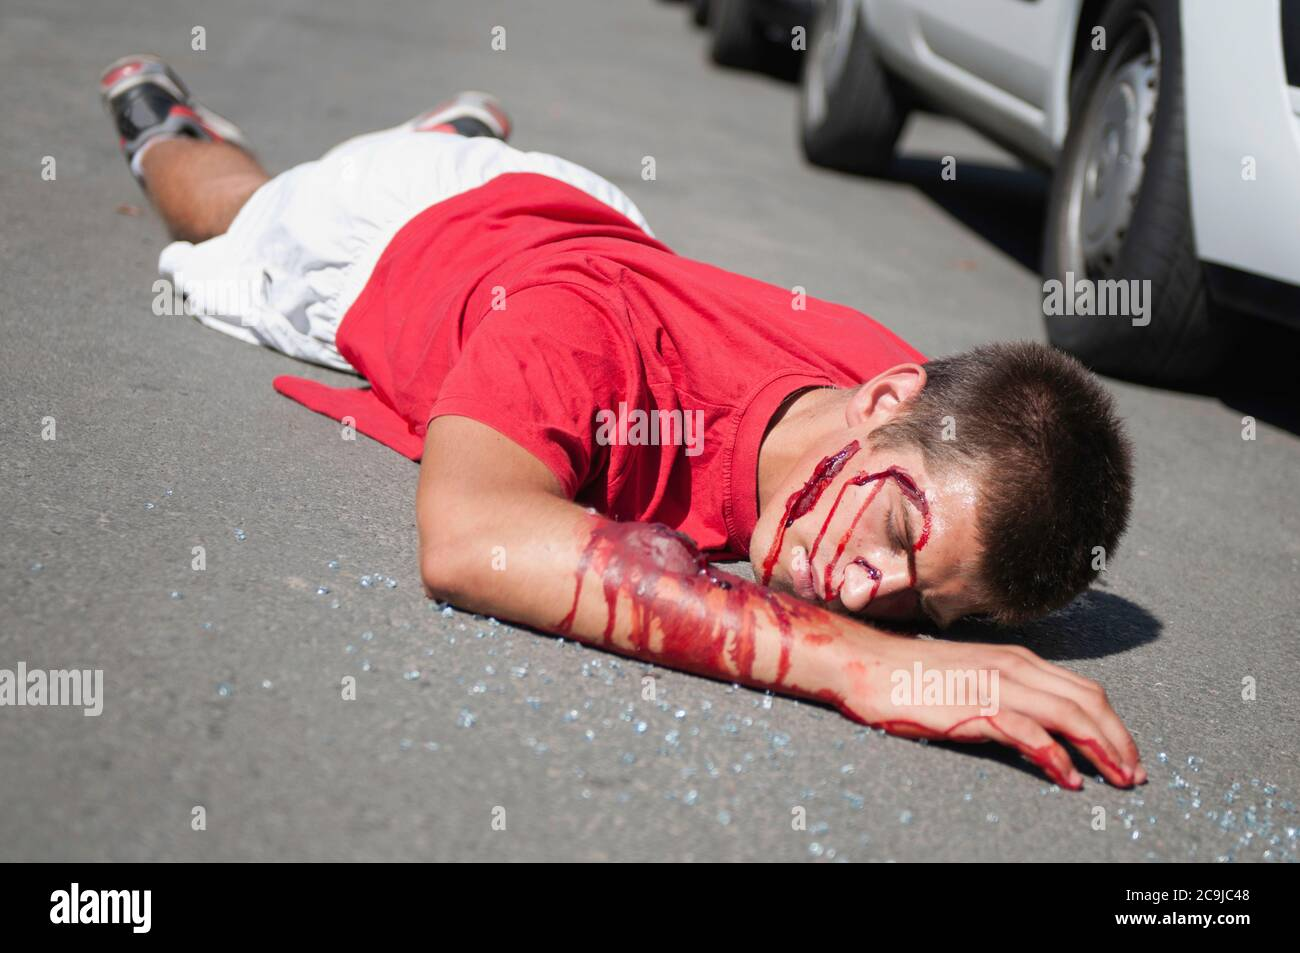

In [2]:
import base64
from pathlib import Path

from IPython.display import HTML

img_path = Path(r"C:\Users\HP\OneDrive\Documents\Github\First_aider\car-accident-victim-lying-on-the-street-simulation-with-realistic-injury-make-up-2C9JC48.jpg")
img_base64 = base64.b64encode(img_path.read_bytes()).decode("utf-8")

# display b64 image in notebook
HTML(f'<img src="data:image/png;base64,{img_base64}"/>')

In [ ]:
from langchain_core.messages import HumanMessage

chat = ChatAnthropic(model="claude-3-opus-20240229")
messages = [
    HumanMessage(
        content=[
            {
                "type": "image_url",
                "image_url": {
                    # langchain logo
                    "url": f"data:image/png;base64,{img_base64}",  # noqa: E501
                },
            },
            {"type": "text", "text": "What is this logo for?"},
        ]
    )
]
chat.invoke(messages)